In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('datasets/missing_value_imputed.csv')

In [4]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [5]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 36,0.82,3,2,2,2.0,New Property,850.0,0,0,0,0,0,0,8
1,flat,sector 89,0.95,2,2,2,4.0,New Property,1226.0,1,1,0,0,0,0,38
2,flat,sohna road,0.32,2,2,1,17.0,New Property,1000.0,0,0,0,0,0,0,49
3,flat,sector 92,1.60,3,4,3+,10.0,Relatively New,1615.0,0,1,0,0,1,1,174
4,flat,sector 102,0.48,2,2,1,5.0,Relatively New,582.0,0,0,1,0,0,0,159


<Axes: ylabel='luxury_score'>

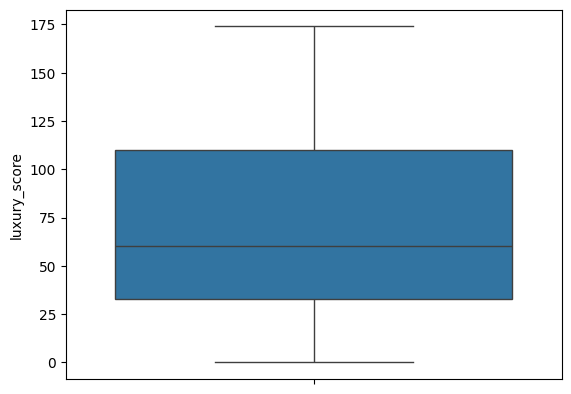

In [6]:
sns.boxplot(df['luxury_score'])

In [7]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [8]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [9]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 36,0.82,3,2,2,2.0,New Property,850.0,0,0,0,0,0,0,8,Low
1,flat,sector 89,0.95,2,2,2,4.0,New Property,1226.0,1,1,0,0,0,0,38,Low
2,flat,sohna road,0.32,2,2,1,17.0,New Property,1000.0,0,0,0,0,0,0,49,Low
3,flat,sector 92,1.60,3,4,3+,10.0,Relatively New,1615.0,0,1,0,0,1,1,174,High
4,flat,sector 102,0.48,2,2,1,5.0,Relatively New,582.0,0,0,1,0,0,0,159,High


<Axes: ylabel='floorNum'>

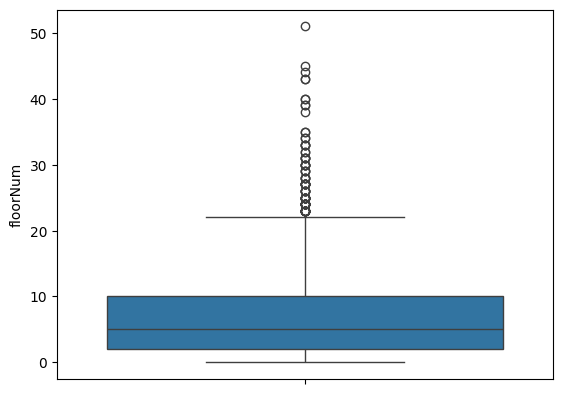

In [10]:
sns.boxplot(df['floorNum'])

In [11]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  

In [12]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [13]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 36,0.82,3,2,2,2.0,New Property,850.0,0,0,0,0,0,0,8,Low,Low Floor
1,flat,sector 89,0.95,2,2,2,4.0,New Property,1226.0,1,1,0,0,0,0,38,Low,Mid Floor
2,flat,sohna road,0.32,2,2,1,17.0,New Property,1000.0,0,0,0,0,0,0,49,Low,High Floor
3,flat,sector 92,1.60,3,4,3+,10.0,Relatively New,1615.0,0,1,0,0,1,1,174,High,Mid Floor
4,flat,sector 102,0.48,2,2,1,5.0,Relatively New,582.0,0,0,1,0,0,0,159,High,Mid Floor


In [14]:

train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [15]:

train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 36,0.82,3,2,2,New Property,850.0,0,0,0,0,0,0,Low,Low Floor
1,flat,sector 89,0.95,2,2,2,New Property,1226.0,1,1,0,0,0,0,Low,Mid Floor
2,flat,sohna road,0.32,2,2,1,New Property,1000.0,0,0,0,0,0,0,Low,High Floor
3,flat,sector 92,1.60,3,4,3+,Relatively New,1615.0,0,1,0,0,1,1,High,Mid Floor
4,flat,sector 102,0.48,2,2,1,Relatively New,582.0,0,0,1,0,0,0,High,Mid Floor


In [16]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 10', 'sector 102', 'sector 103', 'sector 104',
       'sector 105', 'sector 106', 'sector 107', 'sector 108',
       'sector 109', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 30', 'sector 31', 'sector 33',
       'sector 36', 'sector 37', 'sector 37d', 'sector 38', 'sector 39',
       'sector 4', 'sector 40', 'sector 41', 'sector 43', 'sector 45',
       'sector 46', 'sector 47', 'sector 48', 'sector 49', 'sector 5',
       'sector 50', 'sector 51', 'sector 52', 'sector 53', 'sector 54',
       'sector 55', 'sector 56', 'sector 57', 'sector 58', 'sector 59',
       'sector 6', 'sector 60', 'sector 61', 'sector 62', 

In [17]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,36.0,3,2,2.0,1.0,850.0,0,0,0,0,0,0,1.0,1.0
1,0.0,95.0,2,2,2.0,1.0,1226.0,1,1,0,0,0,0,1.0,2.0
2,0.0,103.0,2,2,1.0,1.0,1000.0,0,0,0,0,0,0,1.0,0.0
3,0.0,99.0,3,4,4.0,3.0,1615.0,0,1,0,0,1,1,0.0,2.0
4,0.0,5.0,2,2,1.0,3.0,582.0,0,0,1,0,0,0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3676,0.0,90.0,2,2,1.0,3.0,532.0,0,0,0,0,0,0,2.0,2.0
3677,1.0,12.0,5,5,4.0,3.0,6228.0,1,1,1,1,0,0,0.0,1.0
3678,0.0,23.0,1,1,1.0,0.0,665.0,0,0,0,0,0,1,2.0,2.0
3679,1.0,44.0,5,6,3.0,0.0,5490.0,1,1,1,1,0,0,2.0,2.0


In [18]:
y_label

0        0.82
1        0.95
2        0.32
3        1.60
4        0.48
        ...  
3676     0.37
3677     6.00
3678     0.60
3679    15.50
3680     1.78
Name: price, Length: 3681, dtype: float64

**Technique 1 - Correlation Analysis**

<Axes: >

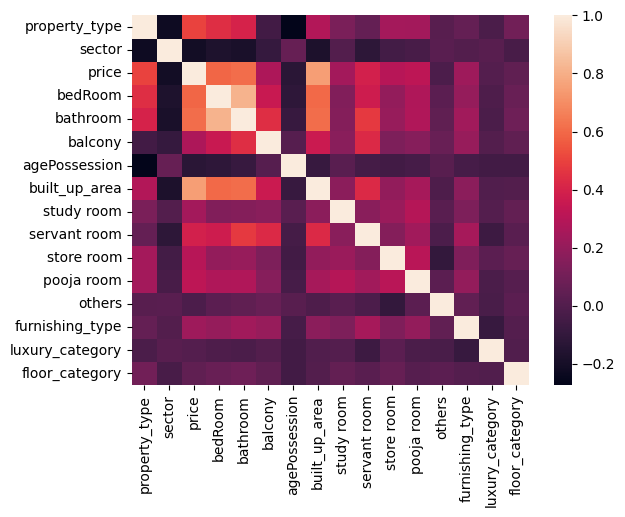

In [20]:
sns.heatmap(data_label_encoded.corr())

In [25]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1.sort_values(by='corr_coeff',ascending=False)

,feature,corr_coeff
1,price,1.000000
6,built_up_area,0.749335
3,bathroom,0.608543
2,bedRoom,0.588492
8,servant room,0.391204
10,pooja room,0.318797
9,store room,0.302324
4,balcony,0.270411
7,study room,0.240061
12,furnishing_type,0.224714


**Technique 2 - Random Forest Feature Importance**

In [22]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.651048
1,sector,0.107060
0,property_type,0.099531
2,bedRoom,0.024180
3,bathroom,0.024017
8,servant room,0.018510
5,agePossession,0.014754
4,balcony,0.012403
12,furnishing_type,0.009209
9,store room,0.008668


**Technique 3 - Gradient Boosting Feature importances**

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.682943
1,sector,0.106542
0,property_type,0.097175
2,bedRoom,0.035939
3,bathroom,0.033150
8,servant room,0.022398
9,store room,0.007360
5,agePossession,0.004733
7,study room,0.004410
12,furnishing_type,0.002782


**Technique 4 - Permutation Importance**

In [26]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.728742
0,property_type,0.201136
1,sector,0.141814
8,servant room,0.031636
2,bedRoom,0.008258
3,bathroom,0.004310
7,study room,0.004050
9,store room,0.001016
10,pooja room,0.000553
4,balcony,0.000360


**Technique 5 - LASSO**

In [27]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
6,built_up_area,1.510265
0,property_type,0.709822
3,bathroom,0.273123
9,store room,0.193039
7,study room,0.165259
12,furnishing_type,0.159291
8,servant room,0.149191
10,pooja room,0.074197
13,luxury_category,0.051988
5,agePossession,0.007585


**Technique 6 - RFE**

In [28]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
6,built_up_area,0.648964
1,sector,0.106153
0,property_type,0.099591
2,bedRoom,0.026145
3,bathroom,0.025039
8,servant room,0.016935
5,agePossession,0.012863
4,balcony,0.012581
12,furnishing_type,0.010732
7,study room,0.009857


**Technique 7 - Linear Regression Weights**

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
# Train a linear regression model on the label-encoded and standardized training data
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
6,built_up_area,1.513200
0,property_type,0.713813
3,bathroom,0.278617
9,store room,0.197258
7,study room,0.172554
12,furnishing_type,0.168843
8,servant room,0.159217
10,pooja room,0.076886
13,luxury_category,0.064398
5,agePossession,0.021813


**Technique 8 - SHAP**

In [32]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

/Users/amulpoudel/Developer/realestate_analytics/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


array([[-0.17111845,  0.15700932, -0.03881995, ..., -0.01242804,
        -0.00206346, -0.00611802],
       [-0.19005632, -0.39057017, -0.04969716, ..., -0.01016874,
        -0.00497487, -0.00310612],
       [-0.16488522, -0.41464746, -0.04792783, ..., -0.01347101,
        -0.00851879, -0.012819  ],
       ...,
       [-0.17367172,  0.0742958 , -0.00812139, ...,  0.00718729,
         0.01647188, -0.00645128],
       [ 1.66359063,  1.21712581,  0.42579144, ...,  0.07700158,
         0.08612136,  0.05438913],
       [-0.30125128,  0.04344169, -0.02258202, ...,  0.00567351,
        -0.01938087,  0.0347649 ]])

In [33]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.238552
0,property_type,0.454285
1,sector,0.394685
3,bathroom,0.115514
8,servant room,0.091690
2,bedRoom,0.053628
4,balcony,0.040228
5,agePossession,0.026986
12,furnishing_type,0.026749
14,floor_category,0.023897


In [48]:
from xgboost import XGBRegressor
xgb =  XGBRegressor()
xgb.fit(X_label, y_label)
xgb.feature_importances_
fi_id9 = pd.DataFrame({
    'feature': X_label.columns,
    'xgb_importance':xgb.feature_importances_}
).sort_values(by='xgb_importance',ascending=False)
fi_id9

,feature,xgb_importance
6,built_up_area,0.309012
0,property_type,0.270807
8,servant room,0.114167
1,sector,0.055907
7,study room,0.039489
2,bedRoom,0.036110
3,bathroom,0.033729
10,pooja room,0.029595
12,furnishing_type,0.023846
9,store room,0.021635


In [49]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').merge(fi_id9,on='feature').set_index('feature')

In [52]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score,xgb_importance
feature,,,,,,,,,
sector,-0.212262,0.107060,0.106542,0.141814,-0.073737,0.106153,-0.082730,0.394685,0.055907
bedRoom,0.588492,0.024180,0.035939,0.008258,0.001587,0.026145,0.004580,0.053628,0.036110
bathroom,0.608543,0.024017,0.033150,0.004310,0.273123,0.025039,0.278617,0.115514,0.033729
balcony,0.270411,0.012403,0.001572,0.000360,-0.038944,0.012581,-0.061720,0.040228,0.015196
agePossession,-0.131300,0.014754,0.004733,-0.000576,0.007585,0.012863,0.021813,0.026986,0.015345
built_up_area,0.749335,0.651048,0.682943,0.728742,1.510265,0.648964,1.513200,1.238552,0.309012
study room,0.240061,0.008168,0.004410,0.004050,0.165259,0.009857,0.172554,0.018717,0.039489
servant room,0.391204,0.018510,0.022398,0.031636,0.149191,0.016935,0.159217,0.091690,0.114167
store room,0.302324,0.008668,0.007360,0.001016,0.193039,0.009226,0.197258,0.018990,0.021635


In [53]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [54]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.717675
sector             0.139742
bathroom           0.030270
servant room       0.028529
bedRoom            0.026087
balcony            0.009839
agePossession      0.009648
study room         0.007660
furnishing_type    0.007656
store room         0.007650
floor_category     0.005156
luxury_category    0.004613
pooja room         0.003694
others             0.001780
dtype: float64

In [55]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,36.0,3,2,2.0,1.0,850.0,0,0,0,0,0,0,1.0,1.0
1,0.0,95.0,2,2,2.0,1.0,1226.0,1,1,0,0,0,0,1.0,2.0
2,0.0,103.0,2,2,1.0,1.0,1000.0,0,0,0,0,0,0,1.0,0.0
3,0.0,99.0,3,4,4.0,3.0,1615.0,0,1,0,0,1,1,0.0,2.0
4,0.0,5.0,2,2,1.0,3.0,582.0,0,0,1,0,0,0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3676,0.0,90.0,2,2,1.0,3.0,532.0,0,0,0,0,0,0,2.0,2.0
3677,1.0,12.0,5,5,4.0,3.0,6228.0,1,1,1,1,0,0,0.0,1.0
3678,0.0,23.0,1,1,1.0,0.0,665.0,0,0,0,0,0,1,2.0,2.0
3679,1.0,44.0,5,6,3.0,0.0,5490.0,1,1,1,1,0,0,2.0,2.0


In [56]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [57]:
scores.mean()

np.float64(0.8146863496276919)

In [58]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')
scores.mean()

np.float64(0.8111799576145591)

In [59]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label